In [40]:
## packages
import pandas as pd
import numpy as np

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

# format
pd.options.display.float_format = '{:,.2f}'.format

In [41]:
## load data

df = pd.read_csv('data/Bobs_df.csv', index_col=0)
df.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,short_term_deposit,loans,...,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10",0,0,...,0.00,0,0,0,0,1,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74",0,0,...,0.00,0,0,0,0,1,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11",0,0,...,0.00,0,0,0,0,1,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54",1,0,...,0.00,0,0,0,0,0,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,ES,50.00,V,23,N,NaN,0,0,...,0.00,0,0,0,0,1,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


In [42]:
## we want to see what's going on with the active/non-active customers

df.loc[df['entry_date']=='2015-02-29','entry_date'] = '2015-02-28'
df.loc[df['entry_date']=='2019-02-29','entry_date'] = '2019-02-28'
df['pk_partition'] = pd.to_datetime(df['pk_partition'],format='%Y-%m-%d')
df.set_index('pk_partition', inplace=True)

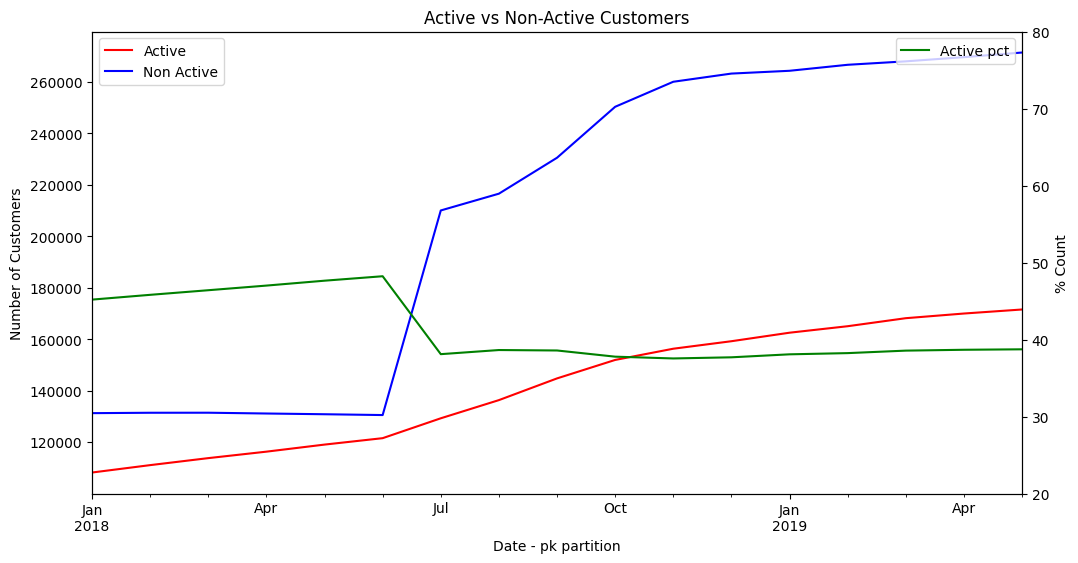

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 6))

df.resample('M')['active_customer'].sum().plot(ax=ax1, color='red', label='Active')
df_non_active = df[df['active_customer']==0]
df_non_active.resample('M')['active_customer'].count().plot(ax=ax1, color='blue', label='Non Active')
ax2 = ax1.twinx()
active_pct = df.resample('M')['active_customer'].sum()/df.resample('M')['active_customer'].count()*100
active_pct.plot(ax=ax2, color='green', label='Active pct')
ax2.set_ylim([20, 80]) 

ax1.set_title('Active vs Non-Active Customers')
ax1.set_xlabel('Date - pk partition')
ax1.set_ylabel('Number of Customers')
ax2.set_ylabel('% Count')

# display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

C:\Users\javce\AppData\Local\Temp\ipykernel_2316\1961948879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_entries.drop_duplicates('pk_cid', inplace=True)


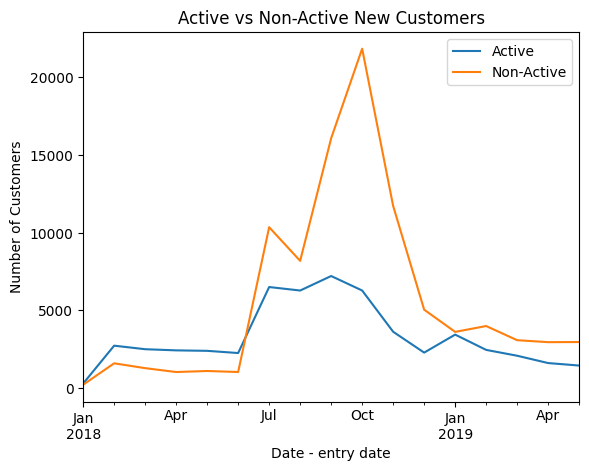

In [44]:
df['entry_date'] = pd.to_datetime(df['entry_date'],format='%Y-%m-%d')
df.reset_index(inplace=True)
df_check_entries = df.loc[df['entry_date']>='2018-01-28']
df_check_entries.set_index('entry_date', inplace=True)
df_check_entries.drop_duplicates('pk_cid', inplace=True)

df_check_entries.resample('M')['active_customer'].sum().plot()
df_non_active_entry = df_check_entries[df_check_entries['active_customer']==0]
df_non_active_entry.resample('M')['active_customer'].count().plot()

plt.xlabel('Date - entry date')
plt.ylabel('Number of Customers')
plt.title('Active vs Non-Active New Customers')
plt.legend(['Active', 'Non-Active'])
plt.show()